In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame using an inner merge on the 'Mouse ID' column
combined_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [19]:
# Checking the number of mice
unique_mice_count = combined_data['Mouse ID'].nunique()

unique_mice_count

249

In [25]:
# Find duplicate mice by ID number that show up for Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"])]

# Display the duplicate mice entries
duplicate_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [26]:
# Define the duplicate mouse ID
duplicate_mouse_id = 'g989' 

# Create a clean DataFrame by dropping rows with the duplicate mouse ID
cleaned_data = combined_data[combined_data['Mouse ID'] != duplicate_mouse_id]

# Display the cleaned DataFrame
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [27]:
unique_mice_count_cleaned = cleaned_data['Mouse ID'].nunique()
unique_mice_count_cleaned

248

In [29]:
# Import necessary libraries
import numpy as np

# Group the data by 'Drug Regimen'
grouped_data = cleaned_data.groupby('Drug Regimen')

# Calculate the mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = grouped_data['Tumor Volume (mm3)'].agg([np.mean, np.median, np.var, np.std, st.sem])

# Rename the columns for clarity
summary_stats = summary_stats.rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Tumor Volume Variance",
    "std": "Tumor Volume Std. Dev.",
    "sem": "Tumor Volume Std. Err."
})

# Display the summary statistics DataFrame
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


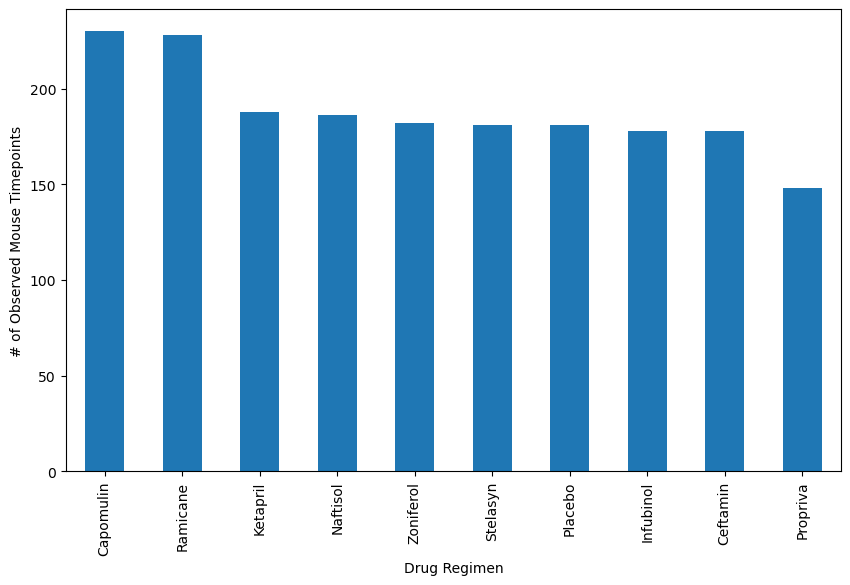

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

regimen_counts.plot(kind="bar", figsize=(10, 6))

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

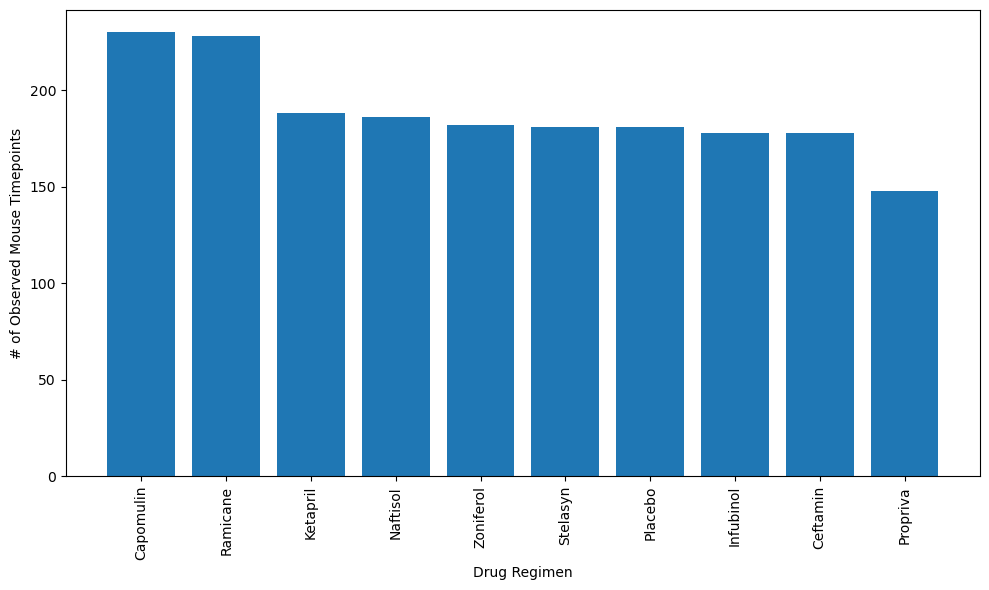

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_names = regimen_counts.index
regimen_values = regimen_counts.values

plt.figure(figsize=(10, 6))
plt.bar(regimen_names, regimen_values)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()

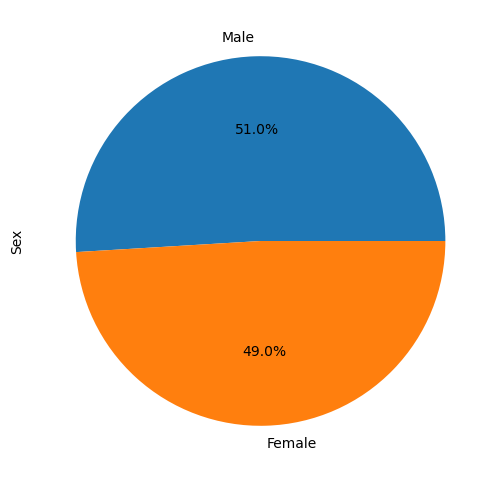

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = cleaned_data['Sex'].value_counts()

sex_counts.plot(kind="pie", autopct="%1.1f%%", figsize=(6, 6))

plt.ylabel("Sex")

plt.show()

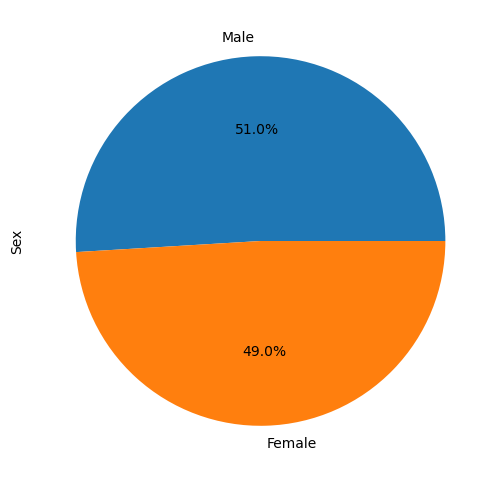

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct="%1.1f%%")

plt.ylabel("Sex")

plt.show()

In [77]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
specific_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = cleaned_data.groupby("Mouse ID")["Timepoint"].max()
last_timepoints_df = last_timepoints.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_data = pd.merge(last_timepoints_df, cleaned_data, on=["Mouse ID", "Timepoint"])

final_tumor_volume_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [59]:
# Create an empty list to hold tumor vol data (for plotting) 
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in specific_regimens:
    
    regimen_data = final_tumor_volume_data[final_tumor_volume_data["Drug Regimen"] == regimen]
    tumor_volumes = regimen_data["Tumor Volume (mm3)"]
    
    # Add subset
    tumor_vol_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr

    outliers = regimen_data[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"{regimen}'s Potential Outliers:")
    print(outliers)


Capomulin's Potential Outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Ramicane's Potential Outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Infubinol's Potential Outliers:
   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
31     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
31  Female          18          25  
Ceftamin's Potential Outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


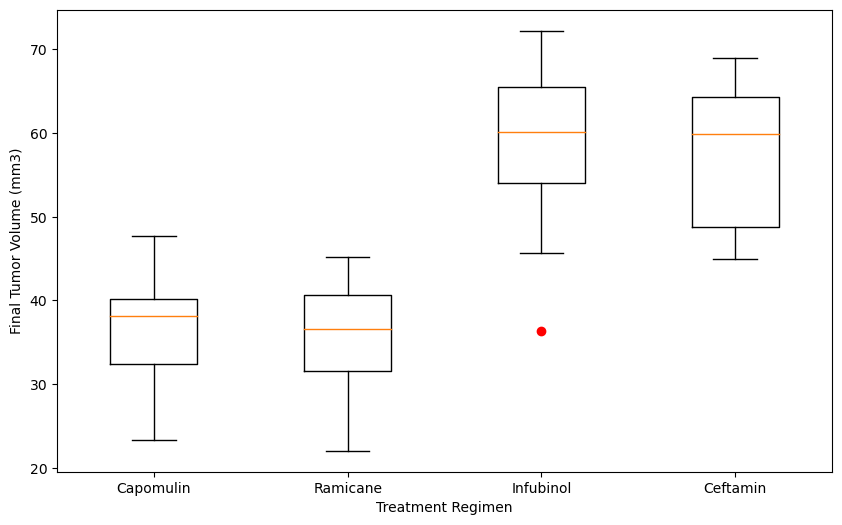

In [64]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_data = [tumor_volumes for tumor_volumes in tumor_vol_data]

labels = specific_regimens

plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=labels, sym="r")

plt.xlabel("Treatment Regimen")
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

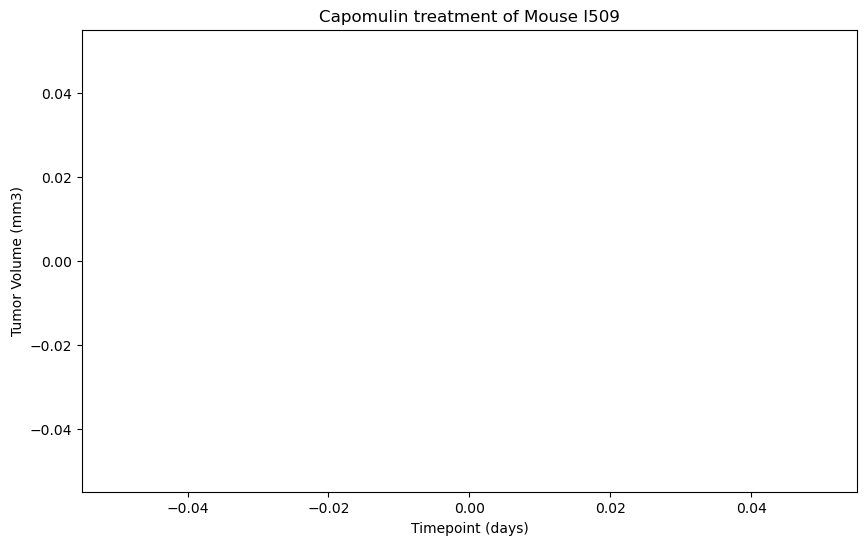

In [93]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'I509'

capomulin_mouse_data = final_tumor_volume_data[(final_tumor_volume_data["Mouse ID"] == mouse_id) & (final_tumor_volume_data["Drug Regimen"] == "Capomulin")]

plt.figure(figsize=(10, 6))
plt.plot(capomulin_mouse_data["Timepoint"], capomulin_mouse_data["Tumor Volume (mm3)"],color="blue", linewidth=1)

plt.title(f"Capomulin treatment of Mouse {mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

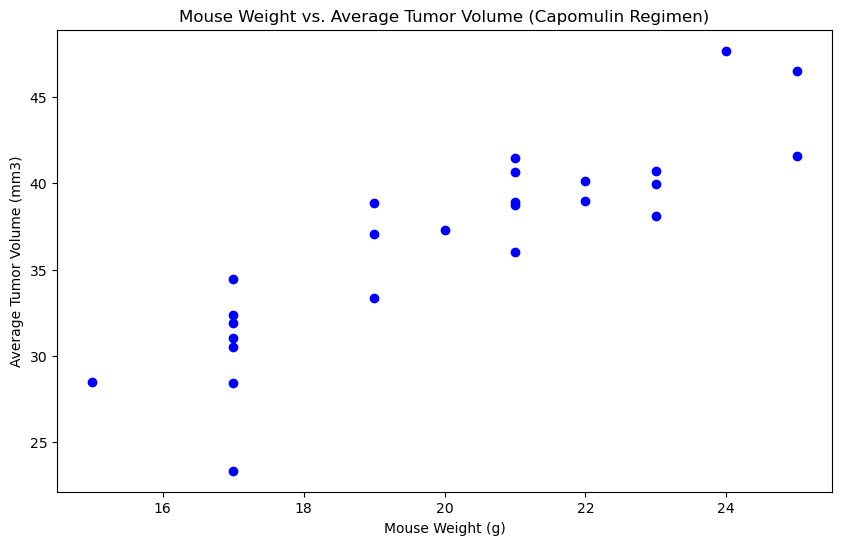

In [81]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = final_tumor_volume_data[final_tumor_volume_data["Drug Regimen"] == "Capomulin"]

capomulin_grouped = capomulin_data.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "first"})

plt.figure(figsize=(10, 6))
plt.scatter(capomulin_grouped["Weight (g)"], capomulin_grouped["Tumor Volume (mm3)"], marker='o', color='b')

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

 The correlation between mouse weight and the average tumor volume is 0.88


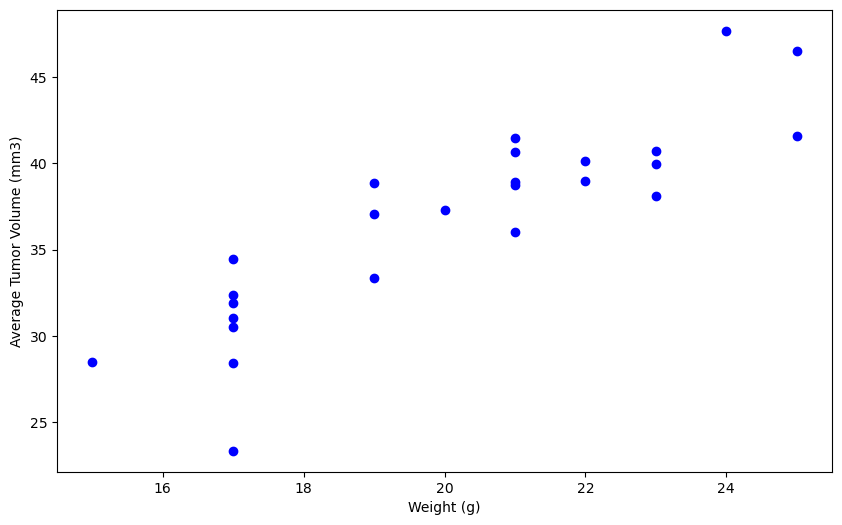

In [96]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = capomulin_grouped["Weight (g)"]
tumor_volume = capomulin_grouped["Tumor Volume (mm3)"]

correlation_coefficient, _ = st.pearsonr(mouse_weight, tumor_volume)

plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, tumor_volume, marker='o', color='b')

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

print(f" The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")
plt.show()
